# **<p style="font-family:newtimeroman;font-size:200%;text-align:center;color:#06445e;">Health Insurance</p>**

# **Step1: Understanding the Business Requirement**

**Develop a predictive model for estimating healthcare expenses**

**This dataset contains information on the relationship between personal attributes (age, gender, BMI, family size, smoking habits), geographic factors, and their impact on medical insurance charges. It can be used to study how these features influence insurance costs and develop predictive models for estimating healthcare expenses.**

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

# **Step2: Data Understanding:**

**Age**: The insured person's age.

**Sex**: Gender (male or female) of the insured.

**BMI (Body Mass Index)**: A measure of body fat based on height and weight.

**Children**: The number of dependents covered.

**Smoker**: Whether the insured is a smoker (yes or no).

**Region**: The geographic area of coverage.

**Expenses**: The medical insurance costs incurred by the insured person.

In [2]:
df = pd.read_excel("insurance.xlsx")
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [3]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Interpreting BMI**
=================================================================================================================

**Healthy BMI (18.5–24.9)**: Indicates that your weight is proportionate to your height, which is typically associated with lower health risks.

**Underweight (Below 18.5)**: May reflect insufficient nutrition, leading to weakened immune function, osteoporosis, and other complications.

**Overweight (25–29.9)**: Signals excess body weight, which may elevate the risk of health issues like hypertension, type 2 diabetes, and heart disease.

**Obesity (30 and above)**: The higher the BMI, the greater the risk of serious health conditions, including metabolic syndrome and certain cancers.

# **Step3: Exploratory Data Analysis**

In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [6]:
print("Categories of sex :",df['sex'].unique())
print(df['sex'].value_counts())
print('====================================')
print("Number of childrens :",df['children'].unique())
print(df['children'].value_counts())
print('====================================')
print("Categories of smoker :",df['smoker'].unique())
print(df['smoker'].value_counts())
print('====================================')
print("Categories of regions :",df['region'].unique())
print(df['region'].value_counts())
print('====================================')

Categories of sex : ['female' 'male']
sex
male      676
female    662
Name: count, dtype: int64
Number of childrens : [0 1 3 2 5 4]
children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64
Categories of smoker : ['yes' 'no']
smoker
no     1064
yes     274
Name: count, dtype: int64
Categories of regions : ['southwest' 'southeast' 'northwest' 'northeast']
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [8]:
continuous = ['bmi','expenses','age']
count = ['children']
categorical = ['sex','smoker','region']

In [9]:
df[continuous].describe()

,bmi,expenses,age
count,1338.000000,1338.000000,1338.000000
mean,30.665471,13270.422414,39.207025
std,6.098382,12110.011240,14.049960
min,16.000000,1121.870000,18.000000
25%,26.300000,4740.287500,27.000000
50%,30.400000,9382.030000,39.000000
75%,34.700000,16639.915000,51.000000
max,53.100000,63770.430000,64.000000


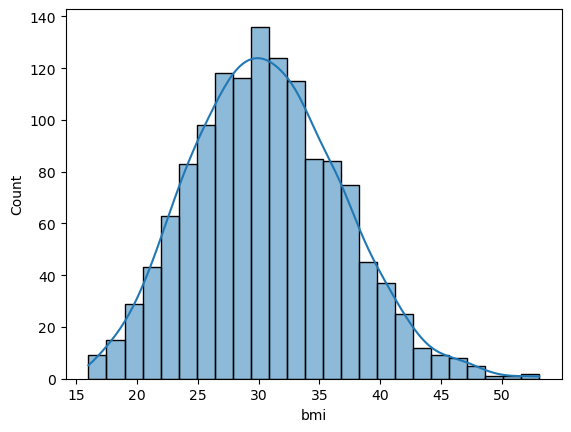

In [10]:
sns.histplot(df["bmi"],kde=True)
plt.show()

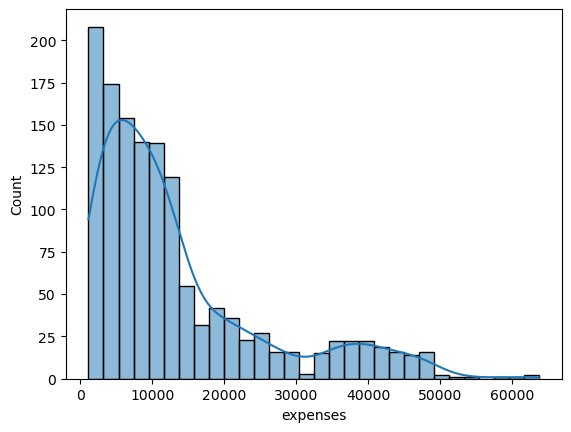

In [11]:
sns.histplot(df["expenses"],kde=True)
plt.show()

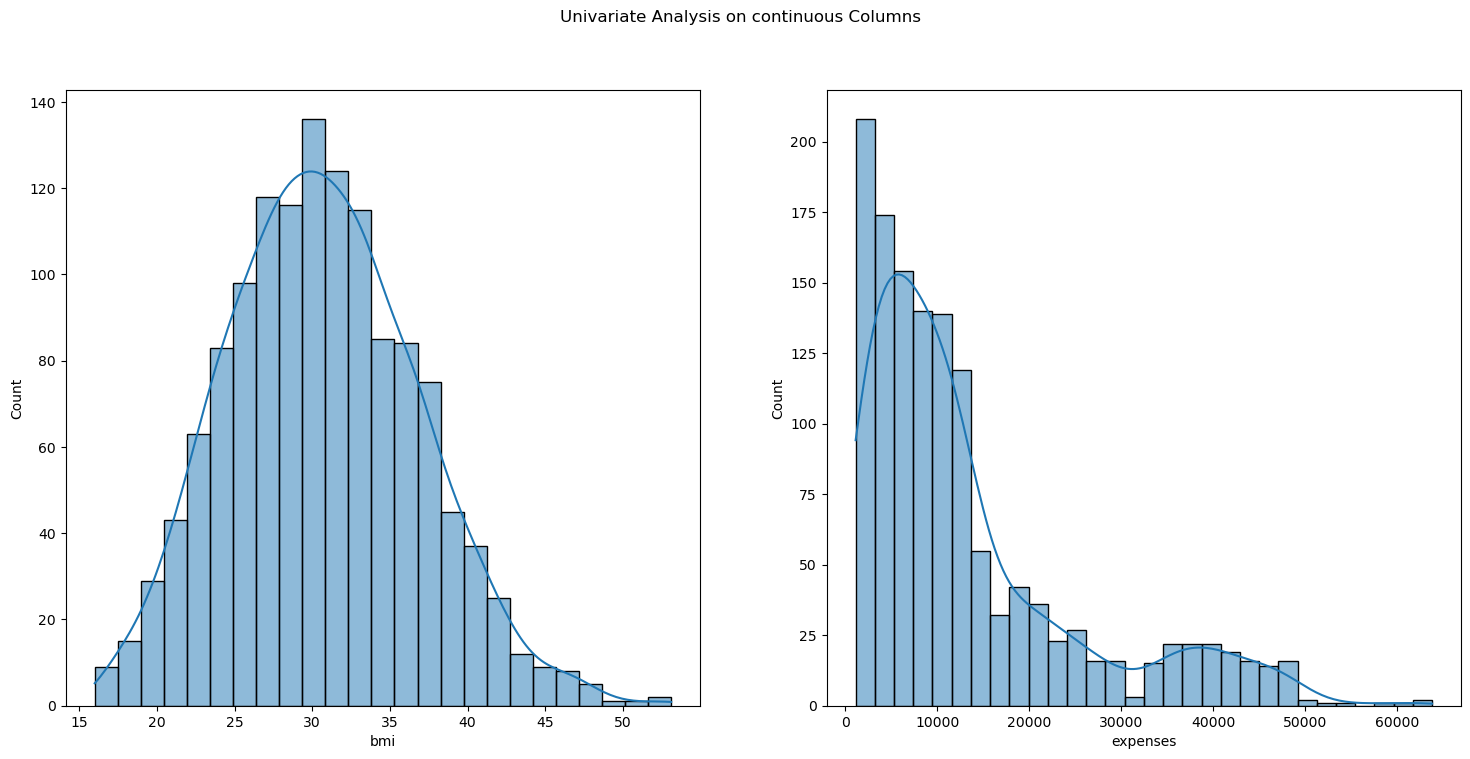

In [12]:
plt.rcParams['figure.figsize'] = (18,8)

plt.subplot(1,2,1)
sns.histplot(df["bmi"],kde=True)

plt.subplot(1,2,2)
sns.histplot(df['expenses'],kde=True)

plt.suptitle('Univariate Analysis on continuous Columns')
plt.show()

In [13]:
df[continuous].skew()

bmi         0.284593
expenses    1.515880
age         0.055673
dtype: float64

In [14]:
df[continuous].corr()

,bmi,expenses,age
bmi,1.000000,0.198576,0.109341
expenses,0.198576,1.000000,0.299008
age,0.109341,0.299008,1.000000


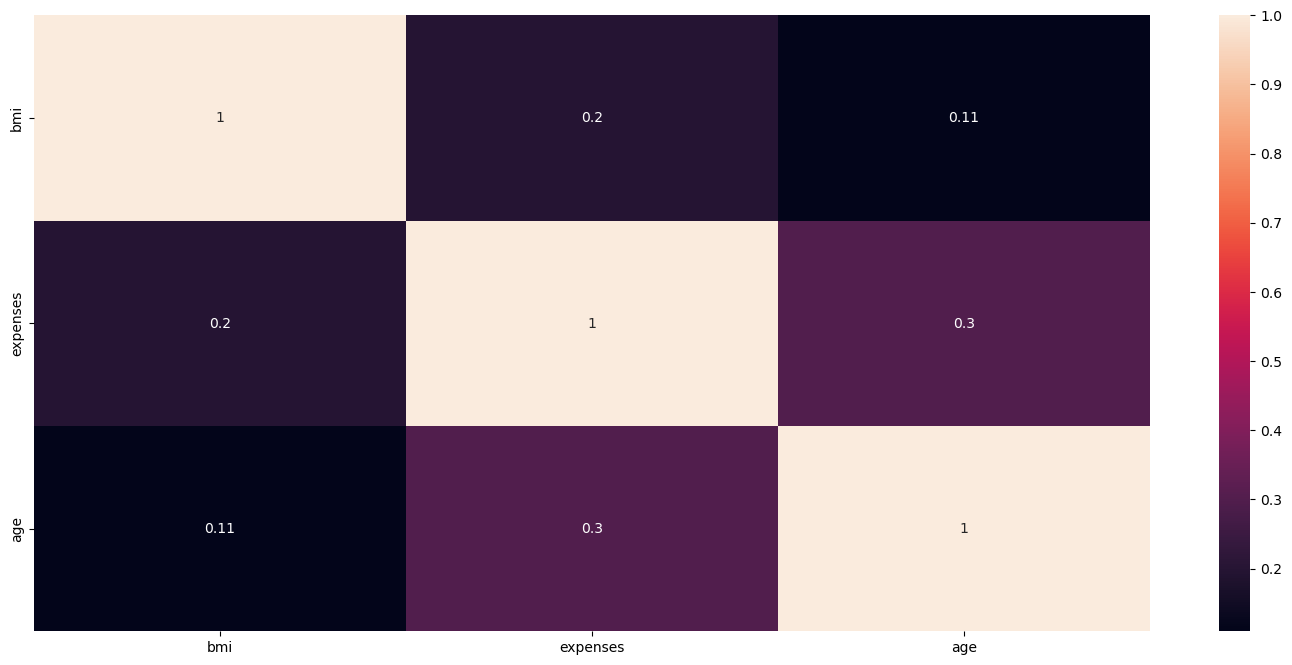

In [15]:
sns.heatmap(df[continuous].corr(),annot=True)
plt.show()

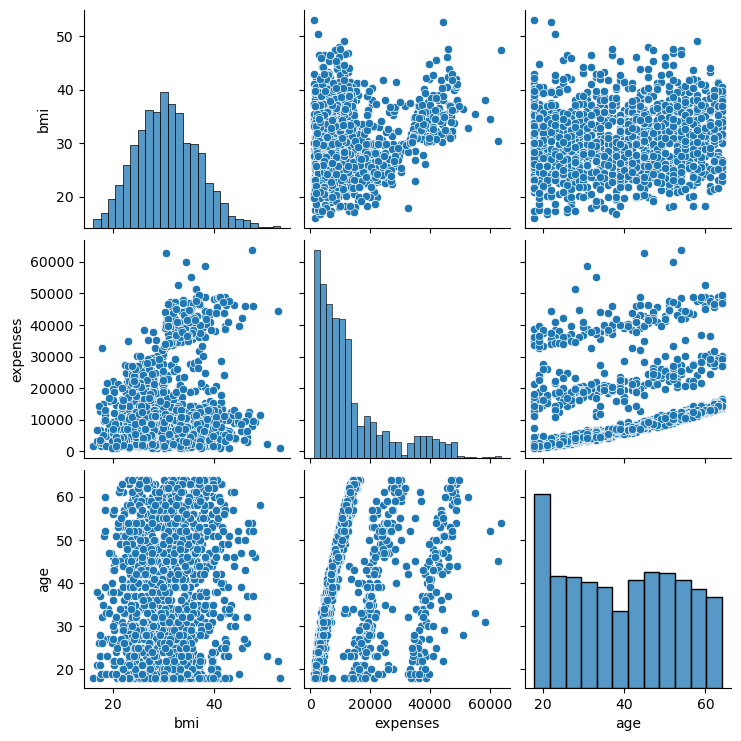

In [16]:
sns.pairplot(df[continuous])
plt.show()

In [17]:
df[categorical].describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


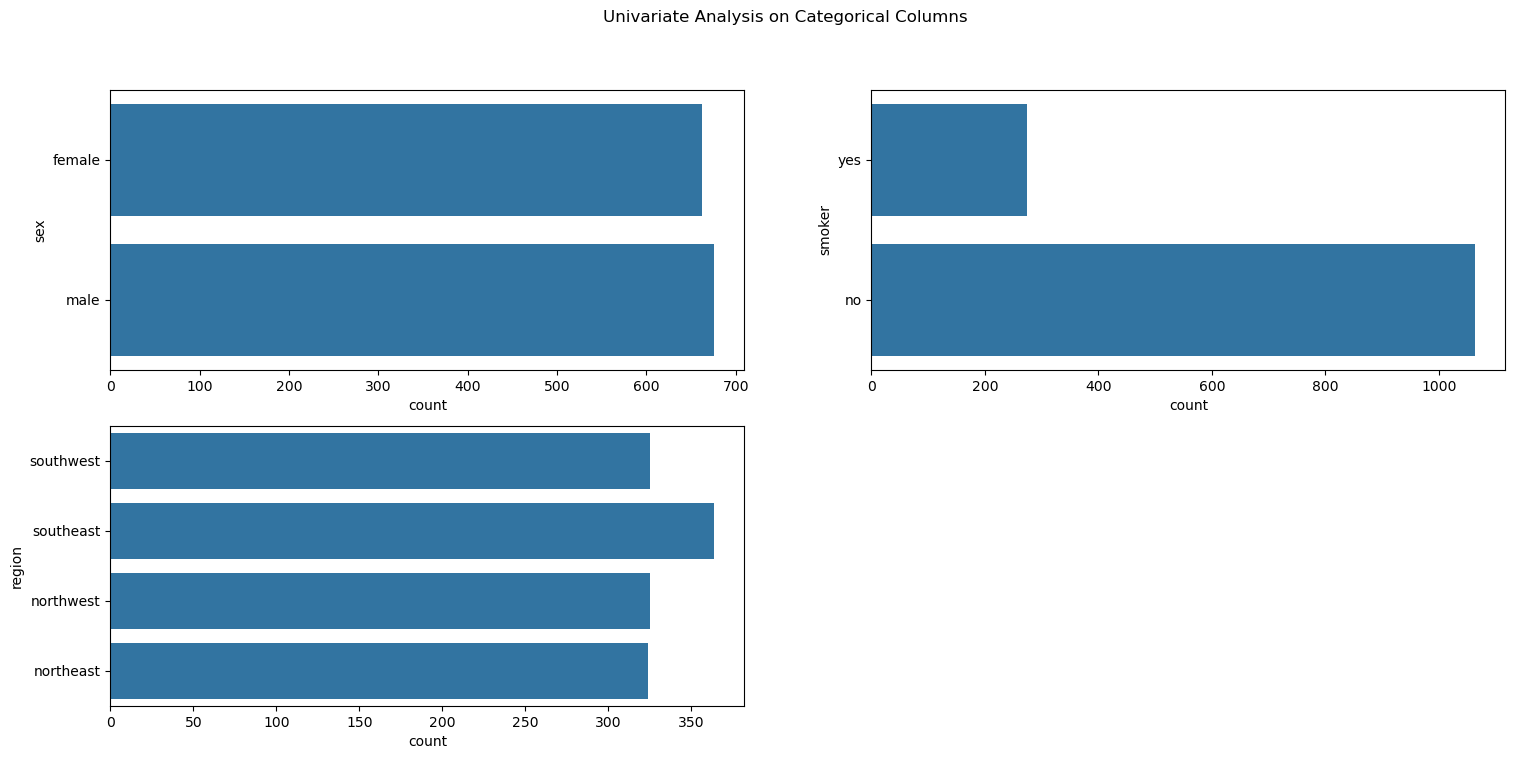

In [18]:
plt.rcParams['figure.figsize'] = (18,8)

plt.subplot(2,2,1)
sns.countplot(df['sex'])

plt.subplot(2,2,2)
sns.countplot(df['smoker'])

plt.subplot(2,2,3)
sns.countplot(df['region'])

plt.suptitle('Univariate Analysis on Categorical Columns')
plt.show()

# **Step4: Data Preprocessing/Data Cleaning**

**Check for missing values**

In [19]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

**Skewness**

In [20]:
df[continuous].skew()

bmi         0.284593
expenses    1.515880
age         0.055673
dtype: float64

**Check Outliers**

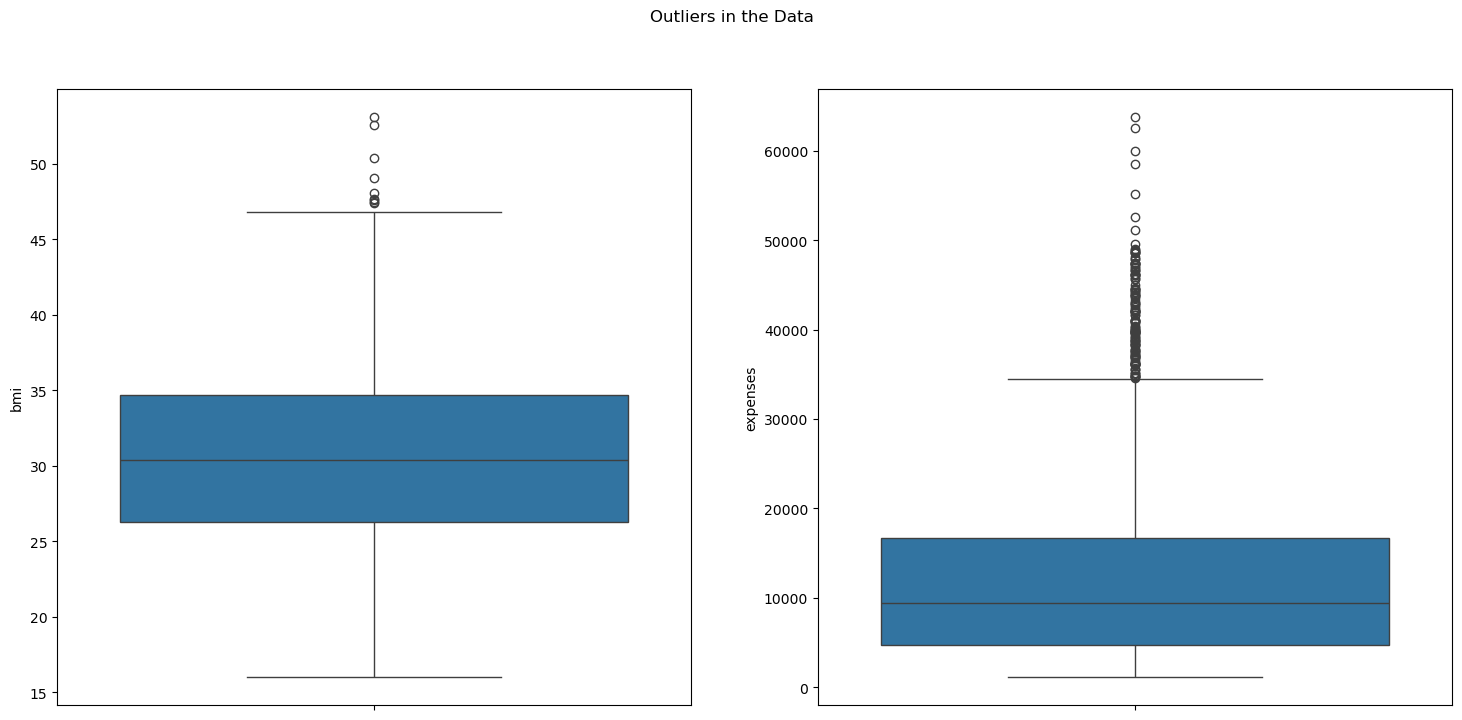

In [21]:
plt.subplot(1,2,1)
sns.boxplot(df["bmi"])

plt.subplot(1,2,2)
sns.boxplot(df['expenses'])

plt.suptitle('Outliers in the Data')
plt.show()

In [22]:
# Calculate Q1, Q3, and IQR
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['bmi'] < lower_bound) | (df['bmi'] > upper_bound)]
outliers

,age,sex,bmi,children,smoker,region,expenses
116,58,male,49.1,0,no,southeast,11381.33
286,46,female,48.1,2,no,northeast,9432.93
401,47,male,47.5,1,no,southeast,8083.92
543,54,female,47.4,0,yes,southeast,63770.43
847,23,male,50.4,1,no,southeast,2438.06
860,37,female,47.6,2,yes,southwest,46113.51
1047,22,male,52.6,1,yes,southeast,44501.40
1088,52,male,47.7,1,no,southeast,9748.91
1317,18,male,53.1,0,no,southeast,1163.46


1. Data Cleaning
   - Wrong data
   - Missing values
   - wrong data type
   - duplicates
   - outliers
2. Data Wrangling
   - transformation (applicable on continuous)
   - scaling (applicable on continuous)
   - encoding (applicabble on categorical)

**In this data set there is no Wrong data, Missing values, wrong data type** 

In [23]:
df.duplicated().sum()

1

In [24]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,expenses
581,19,male,30.6,0,no,northwest,1639.56


In [25]:
df.drop_duplicates(inplace=True)

In [30]:
df.shape

(1337, 7)

In [31]:
df['age'].describe()

count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

**Feature Selection**

In [32]:
df.drop(columns=["region","sex"],inplace=True) # Dropping the region & gender variables which doest not impact to the business requirement

# **Data Wrangling**

In [34]:
df.head()

,age,bmi,children,smoker,expenses
0,19,27.9,0,yes,16884.92
1,18,33.8,1,no,1725.55
2,28,33.0,3,no,4449.46
3,33,22.7,0,no,21984.47
4,32,28.9,0,no,3866.86


**Feature Encoding** 

In [35]:
df['smoker'].replace({'no':0,'yes':1},inplace=True)

In [36]:
df.head()

,age,bmi,children,smoker,expenses
0,19,27.9,0,1,16884.92
1,18,33.8,1,0,1725.55
2,28,33.0,3,0,4449.46
3,33,22.7,0,0,21984.47
4,32,28.9,0,0,3866.86


### **Now every feature is encoded and the data is ready for Modelling and evaluation, Before going to modelling and evaluating let us save the cleaned data into separate excel file**

In [38]:
df.to_excel("Cleaned_data.xlsx",index=False)

In [26]:
df = pd.read_excel("Cleaned_data.xlsx")
df.head()

,age,bmi,children,smoker,expenses
0,19,27.9,0,1,16884.92
1,18,33.8,1,0,1725.55
2,28,33.0,3,0,4449.46
3,33,22.7,0,0,21984.47
4,32,28.9,0,0,3866.86


# **Step5: Modelling and Evaluation**

**X&y**

In [27]:
X = df.drop('expenses',axis=1)
y = df['expenses']

**Train-test-split**

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

### **Model1: Linear Regression model**

In [29]:
#modelling
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

# prediction on train data 
ypred_train = lr_model.predict(X_train)

#train r2_score
from sklearn.metrics import r2_score
print("Train R2:",r2_score(y_train,ypred_train))

# CV score
from sklearn.model_selection import cross_val_score
print("CV Score R2:",cross_val_score(lr_model,X_train,y_train,cv=5,scoring="r2").mean())

# prediction on test data 
ypred_test =lr_model.predict(X_test)

# Evaluation on test data
from sklearn.metrics import r2_score
print("Test R2:",r2_score(y_test,ypred_test))

Train R2: 0.7292436163944094
CV Score R2: 0.7260632974650745
Test R2: 0.8045364806672441


### **Model2: Polynomial Regression Model**

In [30]:
# increasing to higher degree
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=4,include_bias=False)
X_train_poly = pd.DataFrame(polynomial_converter.fit_transform(X_train))
X_test_poly = pd.DataFrame(polynomial_converter.transform(X_test))

# Modelling on train data
from sklearn.linear_model import LinearRegression
poly_model = LinearRegression()
poly_model.fit(X_train_poly,y_train)

print("Coefficients:",poly_model.coef_)
print("intercept:",poly_model.intercept_)

# prediction on train data
ypred_train = poly_model.predict(X_train_poly)

#Evaluation on train data
# finding the test accuracy/(R2)
from sklearn.metrics import r2_score
print("Train R2:",r2_score(y_train,ypred_train))

# Cross validation score
from sklearn.model_selection import cross_val_score
print("CV score :",cross_val_score(poly_model,X_train_poly,y_train,cv=5,scoring="r2").mean())

# Prediction & Evaluation on test data
ypred_test = poly_model.predict(X_test_poly)

from sklearn.metrics import r2_score
print("Test R2:",r2_score(y_test,ypred_test))

Coefficients: [ 5.75808466e+03 -3.50058417e+03 -9.57253344e+03  3.87390576e+04
 -9.50102984e+01 -3.36774435e+02 -1.07923828e+02 -4.34273929e+02
  3.55054167e+02  8.78670973e+02 -4.99697092e+03  4.75283630e+03
 -5.07080639e+03  3.87390619e+04  1.01559594e+00  3.16863854e+00
  1.53974687e+00 -3.94588009e+00  6.56065934e+00 -2.80268958e+00
  5.46222317e+01 -6.69586402e+01  1.56634434e+02 -4.34273719e+02
 -9.62506752e+00 -1.72258725e+01  2.40645012e+02 -1.25360458e+02
  1.66554769e+02 -4.99697081e+03 -6.76164932e+02  1.28623514e+03
 -5.07080638e+03  3.87390619e+04 -5.97858390e-03 -5.87679884e-03
  9.40044175e-03  8.37361903e-02 -4.06454340e-02  4.75874893e-02
 -1.38092144e-01 -4.02253526e-01 -2.28839854e+00 -3.94587822e+00
 -3.09960028e-02 -5.61195367e-02 -1.57726110e+00  1.59759261e+00
 -3.49291957e+00  5.46222292e+01  1.00497099e+01 -1.39587939e+00
  1.56634438e+02 -4.34273720e+02  7.89594108e-02  1.30512656e-01
 -4.55906183e+00  7.31252391e-01 -6.42575835e-01  2.40645011e+02
  4.9366806

### **Model3: Lasso Regression**

In [31]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
estimator = Lasso()
param_grid = {"alpha":list(range(1,40))}

lasso_gs = GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
lasso_gs.fit(X_train,y_train)
lasso_gs.best_estimator_

Lasso(alpha=35)

In [32]:
#modelling
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=35)
lasso_model.fit(X_train,y_train)

# prediction on train data 
ypred_train = lasso_model.predict(X_train)

#train r2_score
from sklearn.metrics import r2_score
print("Train R2:",r2_score(y_train,ypred_train))

# Cross validation score
from sklearn.model_selection import cross_val_score
print("CV Score R2:",cross_val_score(lasso_model,X_train,y_train,cv=5,scoring="r2").mean())

# prediction on test data 
ypred_test = lasso_model.predict(X_test)

#test r2_score 
print("Test R2:",r2_score(y_test,ypred_test))

Train R2: 0.7291816184837383
CV Score R2: 0.7261280468139792
Test R2: 0.8030546787769242


### **Model4: Ridge Regression**

In [33]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Ridge
estimator = Ridge()
param_grid = {"alpha":list(range(1,10))}

r_gs = GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
r_gs.fit(X_train,y_train)
r_gs.best_estimator_

Ridge(alpha=2)

In [34]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=2)
ridge_model.fit(X_train,y_train)

# prediction on train data 
ypred_train = ridge_model.predict(X_train)

#Evaluation
from sklearn.metrics import r2_score
print("Train R2:",r2_score(y_train,ypred_train))

# Cross validation score
from sklearn.model_selection import cross_val_score
print("CV Score R2:",cross_val_score(ridge_model,X_train,y_train,cv=5,scoring="r2").mean())

# prediction on test data 
ypred_test = ridge_model.predict(X_test)

#Evaluation on test data 
print("Test R2:",r2_score(y_test,ypred_test))

Train R2: 0.7291606325685457
CV Score R2: 0.726140845004104
Test R2: 0.8026278270312179


### **Model5: ElasticNet**

In [35]:
import warnings
warnings.filterwarnings("ignore")

In [36]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import ElasticNet
estimator = ElasticNet()
param_grid = {"alpha":list(range(1,40)),"l1_ratio":[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}

en_gs = GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
en_gs.fit(X_train,y_train)
en_gs.best_estimator_

ElasticNet(alpha=35, l1_ratio=1)

In [37]:
from sklearn.linear_model import ElasticNet
en_model = ElasticNet(alpha=35,l1_ratio=1)
en_model.fit(X_train,y_train)

# prediction on train data 
ypred_train = en_model.predict(X_train)

#Evaluation
from sklearn.metrics import r2_score
print("Train R2:",r2_score(y_train,ypred_train))

# Cross validation score
from sklearn.model_selection import cross_val_score
print("CV Score R2:",cross_val_score(en_model,X_train,y_train,cv=5,scoring="r2").mean())

# prediction on test data 
ypred_test = en_model.predict(X_test)

#Evaluation on test data 
print("Test R2:",r2_score(y_test,ypred_test))

Train R2: 0.7291816184837383
CV Score R2: 0.7261280468139792
Test R2: 0.8030546787769242


**Scaling**

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### **Model6: K-NN Regressor**

In [39]:
from sklearn.neighbors import KNeighborsRegressor
estimator = KNeighborsRegressor()
param_grid = {"n_neighbors" : list(range(1,30))}
from sklearn.model_selection import GridSearchCV
cv_classifier = GridSearchCV(estimator, param_grid, cv=5, scoring="r2")
cv_classifier.fit(X_train, y_train)
cv_classifier.best_params_

{'n_neighbors': 25}

In [40]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=25)
knn.fit(X_train,y_train)

# Prediction on Train data
ypred_train = knn.predict(X_train)

#Train accuracy
#Evaluation
from sklearn.metrics import r2_score
print("Train R2:",r2_score(y_train,ypred_train))

#Cross validation score
from sklearn.model_selection import cross_val_score
print("Cross_validation_score :",cross_val_score(knn,X_train,y_train,cv=5).mean())

# Test accuracy
ypred_test = knn.predict(X_test)

#Evaluation on test data 
print("Test R2:",r2_score(y_test,ypred_test))

Train R2: 0.8369195662224529
Cross_validation_score : 0.8237694665055988
Test R2: 0.8789767277681269


In [41]:
import warnings
warnings.filterwarnings("ignore")  

### **Model7: Support Vector Machine (SVM)**

In [42]:
# Hyperparameter tuning
from sklearn.svm import SVR
estimator = SVR()
param_grid = {'C':[0.001,0.01,0.1,1],'kernel':['linear','rbf','sigmoid','poly']}
svm_grid = GridSearchCV(estimator, param_grid, scoring='accuracy',cv=5)
svm_grid.fit(X_train,y_train)

#SVM with best Hyperparameters
svm_grid.best_estimator_

SVR(C=0.001, kernel='linear')

In [43]:
#Modelling
svm = svm_grid.best_estimator_
svm.fit(X_train,y_train)

# Prediction on Train data
ypred_train = svm.predict(X_train)

#Train r2_score
from sklearn.metrics import r2_score
print("Train accuracy :",r2_score(y_train,ypred_train))

#Cross validation score
from sklearn.model_selection import cross_val_score
print("Cross_validation_score :",cross_val_score(svm,X_train,y_train,cv=5).mean())

# Prediction on Test data
ypred_test = svm.predict(X_test)

# Test accuracy
print("Test accuracy :",r2_score(y_test,ypred_test))

Train accuracy : -0.10207275607405264
Cross_validation_score : -0.10195577218113767
Test accuracy : -0.13497069954567698


### **Model8: Decision Tree Regressor**

**First create default DT model (Fully grown tree without any pruning) so that, we can understand the max_depth**

In [44]:
df.columns

Index(['age', 'bmi', 'children', 'smoker', 'expenses'], dtype='object')

In [45]:
X_train_df = pd.DataFrame(X_train, columns=['age', 'bmi', 'children', 'smoker'])
X_train_df.head()

,age,bmi,children,smoker
0,-1.157680,-0.999052,-0.907908,-0.500292
1,-1.300619,-0.800646,0.766904,-0.500292
2,0.914926,1.150347,0.766904,-0.500292
3,1.701087,1.811701,-0.907908,-0.500292
4,0.557580,-0.651842,0.766904,-0.500292


In [46]:
X_test_df = pd.DataFrame(X_test, columns=['age', 'bmi', 'children', 'smoker'])  
X_test_df.head()

,age,bmi,children,smoker
0,0.700518,-1.329729,-0.907908,-0.500292
1,-0.728865,-0.817180,2.441716,-0.500292
2,0.843457,0.968475,1.604310,-0.500292
3,-0.585927,0.637798,1.604310,1.998831
4,-0.585927,1.299152,0.766904,-0.500292


In [47]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=True)
model.fit(X_train_df,y_train)

DecisionTreeRegressor(random_state=True)

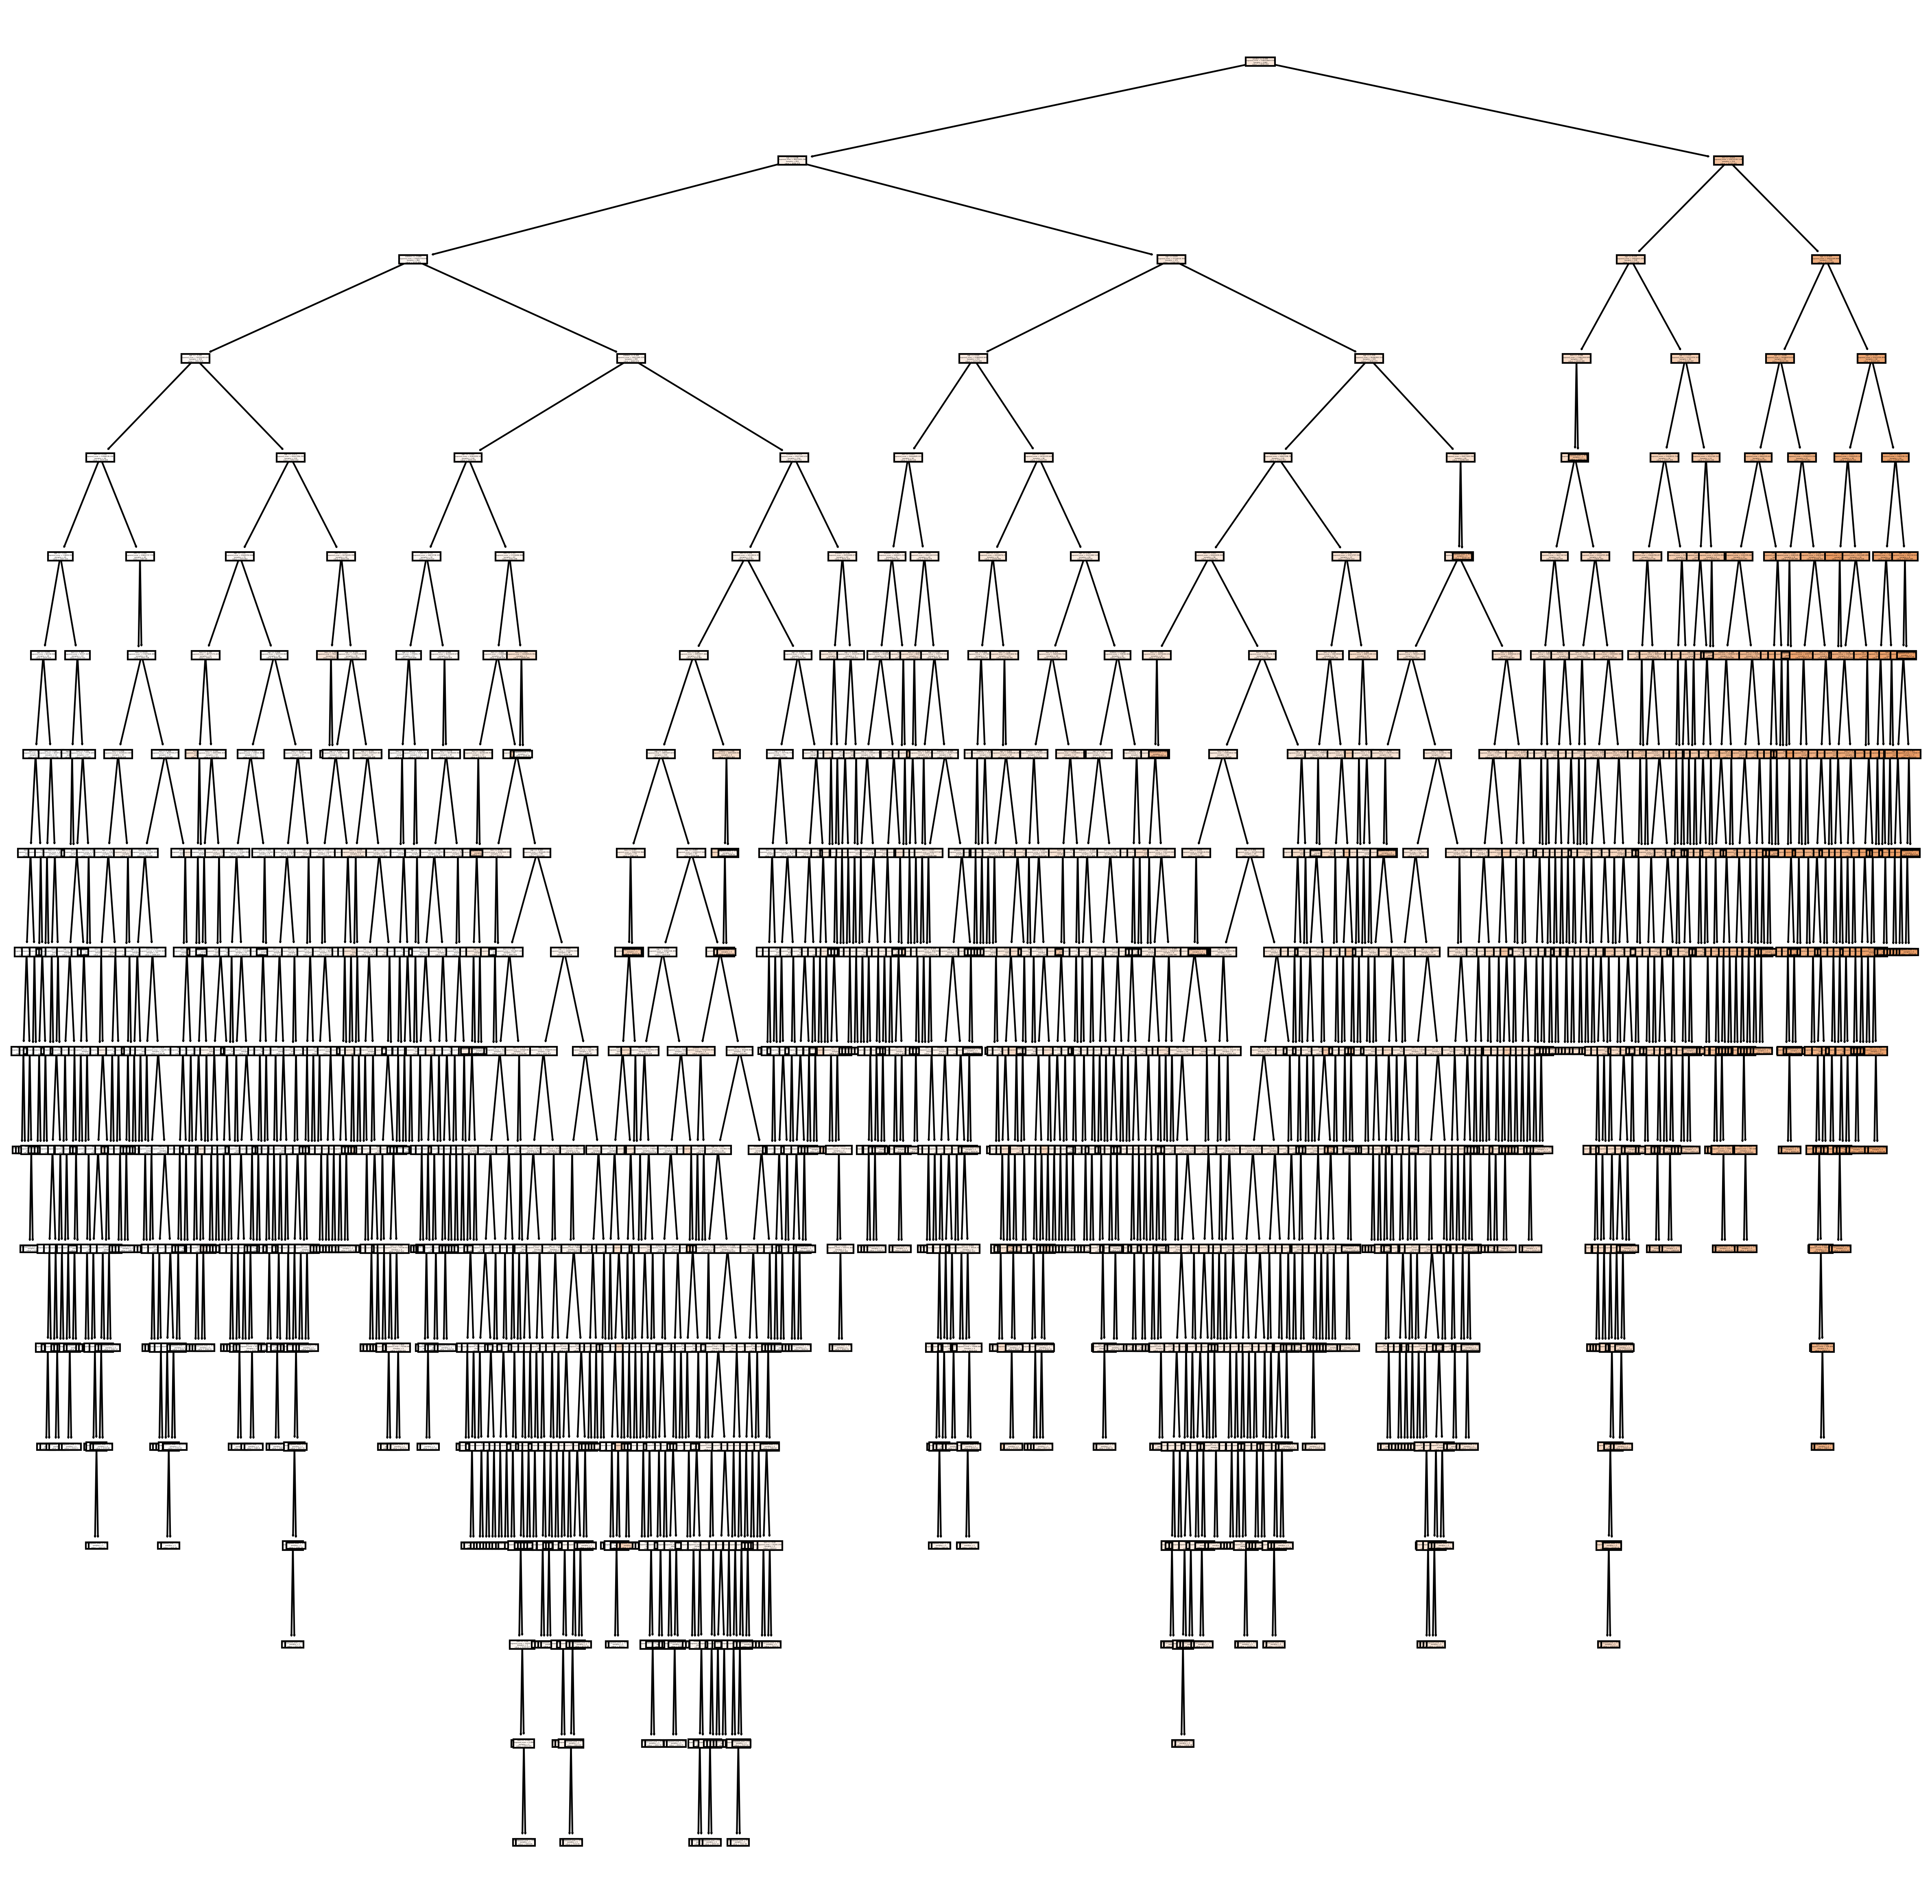

In [48]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20),dpi=300)
plot_tree(model,filled=True,
         feature_names= X_train_df.columns.tolist(),
         class_names=['0','1'])
plt.show()

In [49]:
#Hyperparameter tuning
from sklearn.tree import DecisionTreeRegressor
estimator = DecisionTreeRegressor(random_state=True)
param_grid = {'criterion':['squared_error', 'friedman_mse', 'absolute_error'],
              'max_depth':list(range(1,18))}
dt_grid = GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
dt_grid.fit(X_train_df,y_train)
dt_grid.best_estimator_

DecisionTreeRegressor(criterion='absolute_error', max_depth=5,
                      random_state=True)

In [50]:
#important Features
feats = pd.DataFrame(dt_grid.best_estimator_.feature_importances_,
                     index=X_train_df.columns,
                     columns=['Importance'])
important_features_dt = feats[feats["Importance"]>0].index.tolist()
important_features_dt

['age', 'bmi', 'children', 'smoker']

**Creating Decision Tree model with important parameters and important features**

In [51]:
# Selecting train & test data
X_train_dt = X_train_df[important_features_dt]
X_test_dt  = X_test_df[important_features_dt]

#modelling
dt = dt_grid.best_estimator_
dt.fit(X_train_dt,y_train)

#Prediction on train data
ypred_train = dt.predict(X_train_dt)

#Train accuracy
from sklearn.metrics import r2_score
print("Train accuracy :",r2_score(y_train,ypred_train))

#Cross validation score
from sklearn.model_selection import cross_val_score
print("Cross_validation_score :",cross_val_score(dt,X_train_dt,y_train,cv=5).mean())

# Prediction on Test data
ypred_test = dt.predict(X_test_dt)

# Test accuracy
print("Test accuracy :",r2_score(y_test,ypred_test))

Train accuracy : 0.8482753818929779
Cross_validation_score : 0.8331670224232919
Test accuracy : 0.89712723087044


### **Model9: RandomForest Regression**

In [52]:
# Hyperparameter tuning
from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor(random_state=True)
param_grid = {'n_estimators':list(range(1,20))}
rf_grid = GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
rf_grid.fit(X_train_df,y_train)
rf_grid.best_estimator_

RandomForestRegressor(n_estimators=14, random_state=True)

In [53]:
# important features
feats = pd.DataFrame(rf_grid.best_estimator_.feature_importances_,
                     index=X_train_df.columns,
                     columns=["Importance"])
important_features_rf = feats[feats["Importance"]>0].index.tolist()
important_features_rf

['age', 'bmi', 'children', 'smoker']

In [54]:
# Selecting train & test data
X_train_rf = X_train_df[important_features_rf]
X_test_rf  = X_test_df[important_features_rf]

#modelling
rf = rf_grid.best_estimator_
rf.fit(X_train_rf,y_train)

#Prediction on train data
ypred_train = rf.predict(X_train_rf)

#Train accuracy
from sklearn.metrics import r2_score
print("Train accuracy :", r2_score(y_train,ypred_train))

#Cross validation score
from sklearn.model_selection import cross_val_score
print("Cross_validation_score :",cross_val_score(rf,X_train_rf,y_train,cv=5).mean())

# Prediction on Test data
ypred_test = rf.predict(X_test_rf)

# Test accuracy
print("Test accuracy :",r2_score(y_test,ypred_test))

Train accuracy : 0.9697506370493617
Cross_validation_score : 0.8014833105031827
Test accuracy : 0.851168480561825


### **Model10: GradientBoosting Regression**

In [55]:
# Hyperparameter tuning
from sklearn.ensemble import GradientBoostingRegressor
estimator = GradientBoostingRegressor(random_state=True)
param_grid = {'n_estimators':list(range(1,10)),
              'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}
gb_grid = GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
gb_grid.fit(X_train_df,y_train)
gb_grid.best_estimator_

GradientBoostingRegressor(learning_rate=0.4, n_estimators=8, random_state=True)

In [56]:
# important features
feats = pd.DataFrame(gb_grid.best_estimator_.feature_importances_,
                     index=X_train_df.columns,
                     columns=["Importance"])
important_features_gb = feats[feats["Importance"]>0].index.tolist()
important_features_gb

['age', 'bmi', 'children', 'smoker']

In [57]:
# Selecting train & test data
X_train_gb = X_train_df[important_features_gb]
X_test_gb  = X_test_df[important_features_gb]

#modelling
gb = gb_grid.best_estimator_
gb.fit(X_train_gb,y_train)

#Prediction on train data
ypred_train = gb.predict(X_train_gb)

#Train accuracy
from sklearn.metrics import r2_score
print("Train accuracy :",r2_score(y_train,ypred_train))

#Cross validation score
from sklearn.model_selection import cross_val_score
print("Cross_validation_score :",cross_val_score(gb,X_train_gb,y_train,cv=5).mean())

# Prediction on Test data
ypred_test = gb.predict(X_test_gb)

# Test accuracy
print("Test accuracy :",r2_score(y_test,ypred_test))

Train accuracy : 0.8644610460307152
Cross_validation_score : 0.8438679431349246
Test accuracy : 0.8991354977069546


### **Model11: XGBoost Regressor**

In [60]:
# Hyperparameter tuning
from xgboost import XGBRegressor
estimator = XGBRegressor()
param_grid = {'n_estimators':[10,20,40,100],
              'max_depth':[3,4,5],
              'gamma':[0,0.15,0.3,0.5,1]}
xgb_grid = GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
xgb_grid.fit(X_train_df,y_train)
xgb_grid.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [61]:
# important features
feats_xgb = pd.DataFrame(xgb_grid.best_estimator_.feature_importances_,
                     index=X_train_df.columns,
                     columns=["Importance"])
important_features_xgb = feats_xgb[feats_xgb["Importance"]>0].index.tolist()
important_features_xgb

['age', 'bmi', 'children', 'smoker']

In [63]:
# Selecting train & test data
X_train_xgb = X_train_df[important_features_xgb]
X_test_xgb  = X_test_df[important_features_xgb]

#modelling
xgb = xgb_grid.best_estimator_
xgb.fit(X_train_xgb,y_train)

#Prediction on train data
ypred_train = xgb.predict(X_train_xgb)

#Train accuracy
from sklearn.metrics import r2_score
print("Train accuracy :",r2_score(y_train,ypred_train))

#Cross validation score
from sklearn.model_selection import cross_val_score
print("Cross_validation_score :",cross_val_score(xgb,X_train_xgb,y_train,cv=5).mean())

# Prediction on Test data
ypred_test = xgb.predict(X_test_xgb)

# Test accuracy
print("Test accuracy :",r2_score(y_test,ypred_test))

Train accuracy : 0.8613408961168819
Cross_validation_score : 0.8444787215024622
Test accuracy : 0.8993184005540309


# **Step6: Save the best model**

### **Out of all the algorithms i consider Xgradient Boost algorithm because it having good train&test accuracy and CV score, and Generalizes well.**

In [65]:
from joblib import dump
dump(xgb,'Insurance_prediction.joblib')

['Insurance_prediction.joblib']

# **Step7: Prediction on new data**

In [83]:
input_data = {"age":[20,50,30,15,25],
              "sex":["male","female","male","male","female"],
              "bmi":[18.5,50.5,30.6,20,21.5],
              "children":[0,3,1,0,1],
              "smoker":["no","yes","yes","no","no"],
              "region":["southeast","southwest","southeast","southeast","southwest"]}

In [85]:
# Step 1: Transform new data to DataFrame (same structure as original input)
df = pd.DataFrame(input_data,index=[0,1,2,3,4])
df

,age,sex,bmi,children,smoker,region
0,20,male,18.5,0,no,southeast
1,50,female,50.5,3,yes,southwest
2,30,male,30.6,1,yes,southeast
3,15,male,20.0,0,no,southeast
4,25,female,21.5,1,no,southwest


**Apply Data preprocessing on unknown data**

In [86]:
df.drop(columns=["region","sex"],inplace=True)
df['smoker'].replace({'no':0,'yes':1},inplace=True)

df_new = df

In [87]:
df_new

,age,bmi,children,smoker
0,20,18.5,0,0
1,50,50.5,3,1
2,30,30.6,1,1
3,15,20.0,0,0
4,25,21.5,1,0


In [91]:
# Step 2: Select only the important features used by XGBoost
df_new_selected = df_new[important_features_xgb]
# Step 3: Apply the same scaling used for training (IMPORTANT!)
df_new_scaled = sc.transform(df_new_selected)
# Step 4: Predict using the trained best XGBoost model
predictions = xgb.predict(df_new_scaled)
print("Health Expenses Predictions:", predictions)

Health Expenses Predictions: [ 3676.832 44902.832 37497.336  3272.633  5310.292]


# **<p style="font-family:newtimeroman;font-size:200%;text-align:center;color:#06445e;">Thank You</p>**

# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#06445e;">Behara Pavan Kumar</p>**